In [32]:
import math
import random

import gym
import numpy as np

import cma

# import time

In [33]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib widget
# %matplotlib tk

In [133]:
np.ceil(34/7)

5.0

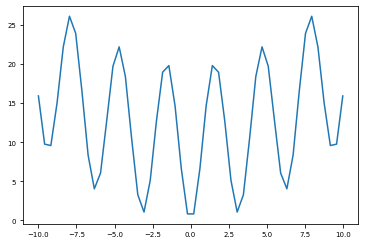

In [112]:
def f(x):
    return np.sum(x**2)/10 + 20*np.sin(x)**2

l=10
X = np.linspace(-l,l,50)
plt.plot(X, [f(x) for x in X])

In [117]:
N=50
sigma=10
x0 = np.random.randn(N)*sigma
es = cma.CMAEvolutionStrategy(x0, sigma)

(7_w,15)-aCMA-ES (mu_w=4.5,w_1=34%) in dimension 50 (seed=542176, Wed May 13 16:03:55 2020)


In [118]:
print(4+np.floor(3*np.log(N)))
es.popsize

15.0


15

400   6000 1.875142626213028e-05 4.0e+00 1.45e-03  4e-04  1e-03 0:01.6
1.506941424451353e-05 0.0014525374077263733


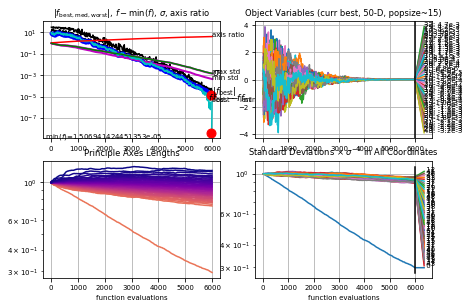

In [126]:
for i in range(200):
    candidates = es.ask()
    rewards = np.array([f(c) for c in candidates])
    es.tell(candidates, rewards)
    es.logger.add()  # write data to disc to be plotted
    # es.disp()
    # es.result
    # print(es.result.fbest, es.sigma)
es.disp()
cma.plot()
print(es.result.fbest, es.sigma)

In [121]:
es.result

CMAEvolutionStrategyResult(xbest=array([ 5.11899297e-10, -1.34283358e-09, -1.56032207e-09,  2.90408534e-09,
       -5.32326301e-09,  1.55837312e-09,  5.37786236e-09,  2.91904152e-09,
       -2.65795339e-09, -1.98744800e-09, -4.69662625e-09,  4.39124324e-09,
       -4.91613758e-09,  2.66311773e-09, -3.70663672e-09, -7.93910964e-10,
        1.37243190e-10, -2.96293731e-09,  1.10102875e-09,  2.90550042e-09,
        6.75851813e-09,  7.43832165e-11,  4.19128026e-09, -2.16407258e-09,
       -3.22392755e-09,  1.08142185e-09,  4.65591069e-09, -4.20405653e-09,
        3.86047479e-09, -4.79831084e-09, -1.82008776e-09,  4.32865837e-10,
        2.33240842e-09,  8.09493446e-10, -4.75506382e-09,  1.73971652e-09,
       -5.84733910e-09,  2.14640628e-09,  2.49930289e-09,  6.25587201e-10,
       -2.91186352e-09,  7.31399017e-09, -1.37181686e-09,  1.36186973e-09,
       -1.32218782e-09,  2.88747500e-09, -3.18777819e-10,  1.55095425e-09,
       -2.78577957e-09,  1.94600275e-10]), fbest=5.735328729232905e

(7_w,15)-aCMA-ES (mu_w=4.5,w_1=34%) in dimension 50 (seed=496239, Wed May 13 16:13:02 2020)
  200   3000 3.327949667381278e-02 2.4e+00 4.29e-02  2e-02  5e-02 0:01.0
0.027302942384085958 0.0428788533952456


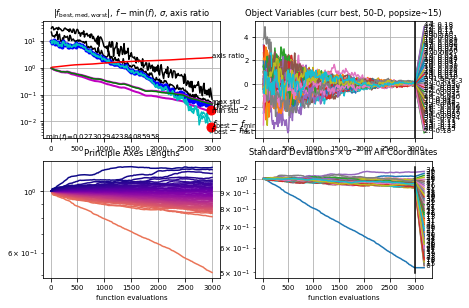

In [127]:
N=50
sigma=1
x0 = np.random.randn(N)*sigma
es = cma.CMAEvolutionStrategy(x0, sigma)
for i in range(200):
    candidates = es.ask()
    rewards = np.array([f(c) for c in candidates])
    es.tell(candidates, rewards)
    es.logger.add()

es.disp()
cma.plot()
print(es.result.fbest, es.sigma)

(7_w,15)-aCMA-ES (mu_w=4.5,w_1=34%) in dimension 50 (seed=583689, Wed May 13 16:16:17 2020)
  200   3000 2.200054117809107e+00 2.4e+00 2.72e-01  2e-01  3e-01 0:01.0
2.110222581180448 0.2719404485973957


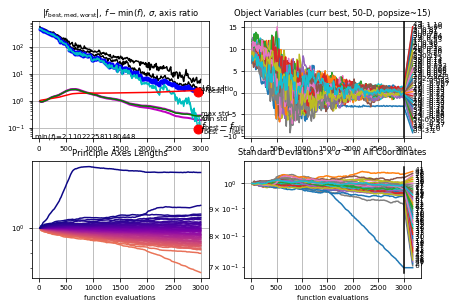

In [130]:
N=50
sigma=1
x0 = np.random.randn(N)*sigma + 10
es = cma.CMAEvolutionStrategy(x0, sigma)
for i in range(200):
    candidates = es.ask()
    rewards = np.array([f(c) for c in candidates])
    es.tell(candidates, rewards)
    es.logger.add()

es.disp()
cma.plot()
print(es.result.fbest, es.sigma)

(7_w,15)-aCMA-ES (mu_w=4.5,w_1=34%) in dimension 50 (seed=494934, Wed May 13 16:16:22 2020)
  200   3000 1.553796127511776e+00 1.8e+00 3.02e-01  2e-01  3e-01 0:01.3
1.5537961275117758 0.3018383689332773


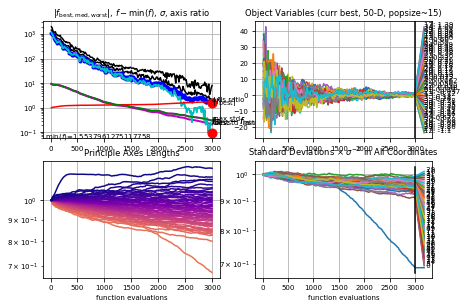

In [131]:
N=50
sigma=10
x0 = np.random.randn(N)*sigma + 10
es = cma.CMAEvolutionStrategy(x0, sigma)
for i in range(200):
    candidates = es.ask()
    rewards = np.array([f(c) for c in candidates])
    es.tell(candidates, rewards)
    es.logger.add()

es.disp()
cma.plot()
print(es.result.fbest, es.sigma)

In [39]:
def layer_end_indices(size_in, sizes_hid, size_out):
    layer_sizes = [size_in] + sizes_hid + [size_out]
    indices=[]

    index_so_far=0
    for i in range(len(layer_sizes)-1):
        # weight matrix
        weight_size = layer_sizes[i] * layer_sizes[i+1]
        index_so_far += weight_size
        indices.append(index_so_far)
        # bias vector
        bias_size = layer_sizes[i+1]
        index_so_far += bias_size
        indices.append(index_so_far)
    
    indices.append(index_so_far + layer_sizes[-2]*layer_sizes[-1])

    return indices

def weight_and_bias_indices(layer_sizes):
    # layer_sizes = [size_in] + sizes_hidden + [size_out]
    weight_inds=[]
    bias_inds=[]

    index_so_far=0
    for i in range(len(layer_sizes)-1):
        # weight matrix
        weight_size = layer_sizes[i] * layer_sizes[i+1]
        weight_inds.append((index_so_far, index_so_far + weight_size))
        index_so_far += weight_size
        # bias vector
        bias_size = layer_sizes[i+1]
        bias_inds.append((index_so_far, index_so_far + bias_size))
        index_so_far += bias_size
    
    return weight_inds, bias_inds

def get_weights_and_biases_as_param_vects(param_vector, weight_inds, bias_inds):
    if len(weight_inds)!=len(bias_inds):
        raise ValueError(
            f"number of weight matrices ({len(weight_inds)}) != "
            f"number of bias vectors ({len(bias_inds)})"
        )
    weights = []
    biases = []
    for i in range(len(weight_inds)):
        w0,w1 = weight_inds[i]
        b0,b1 = bias_inds[i]
        weights.append(param_vector[w0:w1])
        biases.append(param_vector[b0:b1])
    return weights, biases

def get_weights_and_biases(param_vector, layer_sizes):
    weight_inds, bias_inds = weight_and_bias_indices(layer_sizes)
    weights_v, biases_v = get_weights_and_biases_as_param_vects(
        param_vector, weight_inds, bias_inds
    )
    weights = []
    biases = []
    for i,w in enumerate(weights_v):
        weights.append(w.reshape(layer_sizes[i+1],layer_sizes[i]))
    

    for b in biases_v):
        biases.append(b.reshape(-1,1))

    return weights, biases

# def apply_layers(weights,biases,state,activation):
#     v = state
#     for i, W in enumerate(weights[:-1]):
#         b = biases[i]
#         v = activation(np.matmul(W, v) + b)
#     return np.matmul(weights[-1], v)



SyntaxError: invalid syntax (<ipython-input-39-ad559497dad4>, line 62)

In [40]:
weight_and_bias_indices(2,[5,4,5],2)

([(0, 10), (15, 35), (39, 59), (64, 74)],
 [(10, 15), (35, 39), (59, 64), (74, 76)])

In [41]:
w_ind, b_ind = weight_and_bias_indices(2,[5,4,5],2)
get_weights_and_biases(np.array(range(b_ind[-1][-1])),w_ind, b_ind)


([array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
  array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
         32, 33, 34]),
  array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
         56, 57, 58]),
  array([64, 65, 66, 67, 68, 69, 70, 71, 72, 73])],
 [array([10, 11, 12, 13, 14]),
  array([35, 36, 37, 38]),
  array([59, 60, 61, 62, 63]),
  array([74, 75])])